In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt



In [6]:
pixel_no=np.loadtxt('GMOSS_params_allpix.txt',usecols=0,dtype='int',delimiter=' ') # pixel number
model_pix=np.loadtxt('GMOSS_params_allpix.txt',usecols=1,dtype='int',delimiter=' ') # 0 for convex, 1 for concave

In [45]:
c3=np.loadtxt('GMOSS_params_allpix.txt',usecols=2,dtype='float',delimiter=' ') #fnorm for convex in power of 10; fnorm1 for concave in proper units
c4=np.loadtxt('GMOSS_params_allpix.txt',usecols=3,dtype='float',delimiter=' ') # alpha1 for convex and concave in power of 10

c5=np.loadtxt('GMOSS_params_allpix.txt',usecols=4,dtype='float',delimiter=' ') # delta_a for convex in power of 10; -10^(value) for concave

c6=np.loadtxt('GMOSS_params_allpix.txt',usecols=5,dtype='float',delimiter=' ') # nu_break in power of 10, but only for convex pixels; fnorm2 for concave in proper units
c7=np.loadtxt('GMOSS_params_allpix.txt',usecols=6,dtype='float',delimiter=' ') # Ix in power of 10
c8=np.loadtxt('GMOSS_params_allpix.txt',usecols=7,dtype='float',delimiter=' ') # Te in power of 10
c9=np.loadtxt('GMOSS_params_allpix.txt',usecols=8,dtype='float',delimiter=' ') # nu_T in power of 10
c10=np.loadtxt('GMOSS_params_allpix.txt',usecols=9,dtype='float',delimiter=' ') # chi squared

In [18]:
nside=16
npix=hp.nside2npix(nside)
map1=np.arange(npix,dtype=float)
#hp.mollview(map1,nest=True)

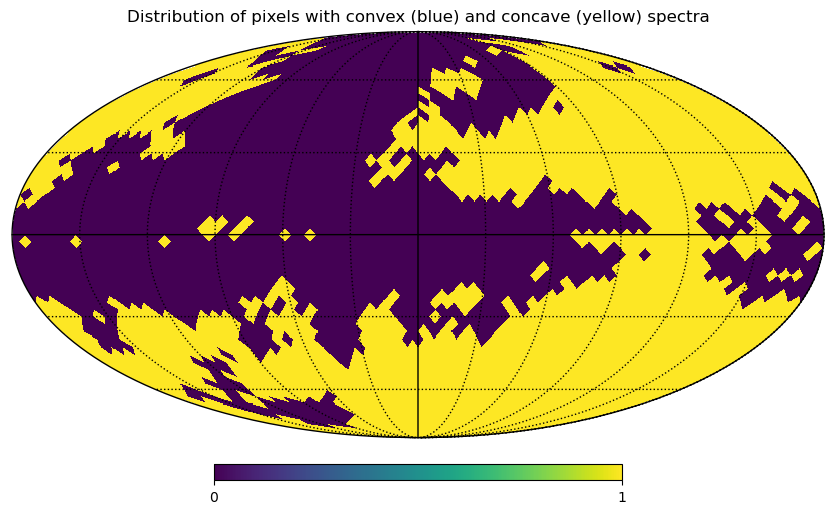

In [46]:
hp.mollview(model_pix,nest=True,title='Distribution of pixels with convex (blue) and concave (yellow) spectra')
hp.graticule()

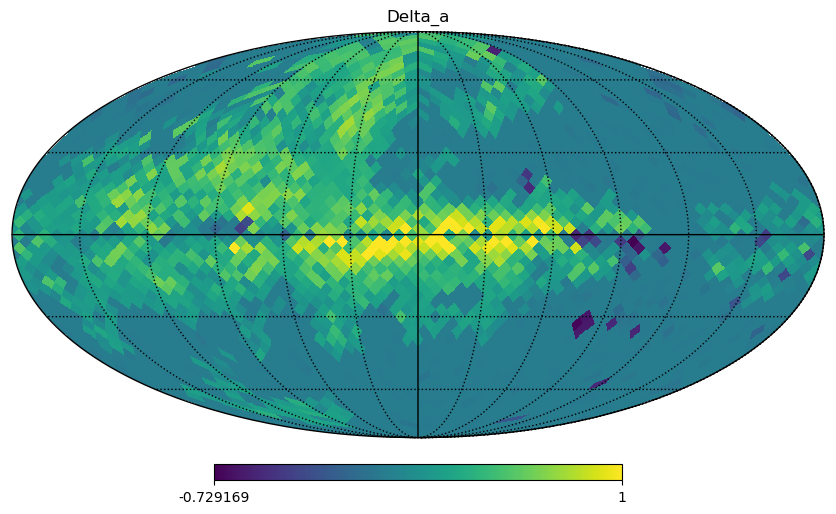

In [56]:
# delta_a=10**c5



delta_a=np.zeros(len(model_pix))
for i in range(len(model_pix)):
    if model_pix[i]==0:
        delta_a[i]=10**c5[i]
    else:
        delta_a[i]=-10**c5[i]


hp.mollview(delta_a,nest=True,title='Delta_a')
hp.graticule()

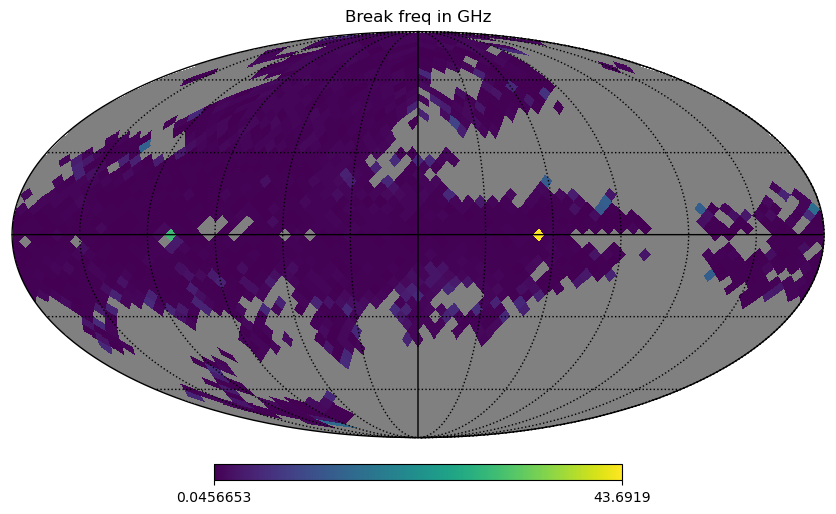

In [48]:
nu_break=np.zeros(len(model_pix))
for i in range(len(model_pix)):
    if model_pix[i]==0:
        nu_break[i]=1e-9*10**c6[i]
    else:
        nu_break[i]='NaN'
    
hp.mollview(nu_break,nest=True,title='Break freq in GHz')
hp.graticule()

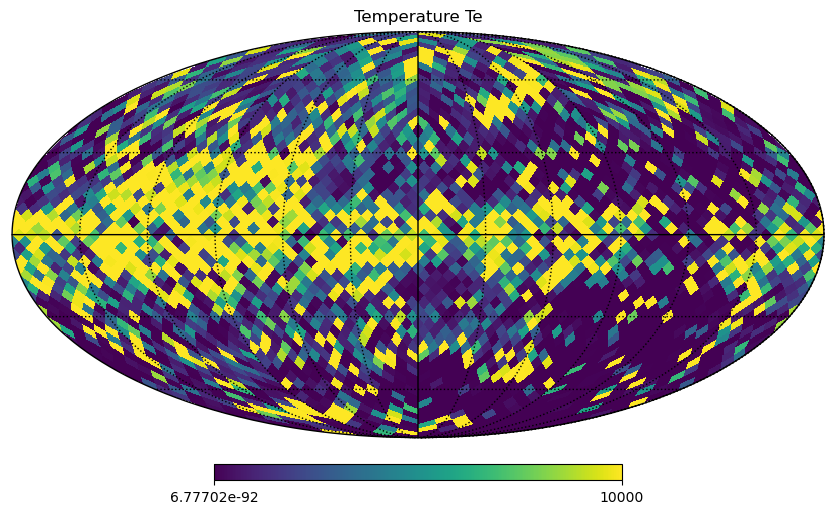

In [49]:
Te=10**c8
hp.mollview(Te,nest=True,title='Temperature Te')
hp.graticule()

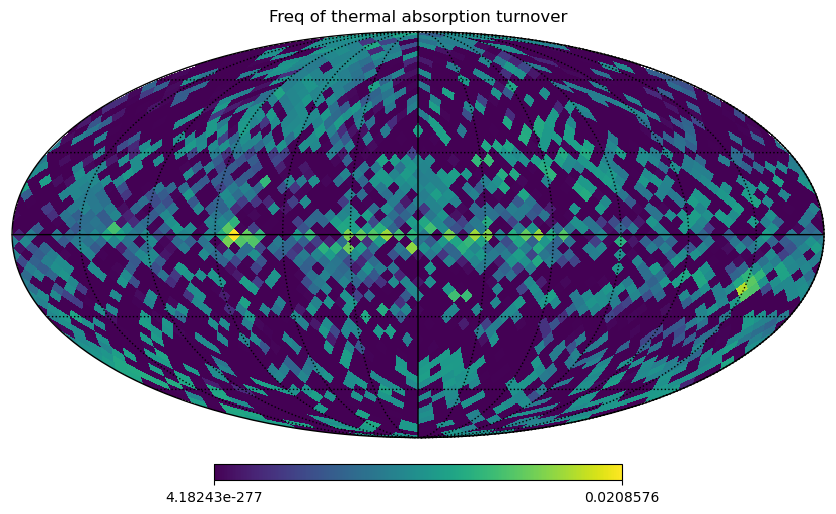

In [51]:
hp.mollview(10**c9,nest=True,title='Freq of thermal absorption turnover')
hp.graticule()

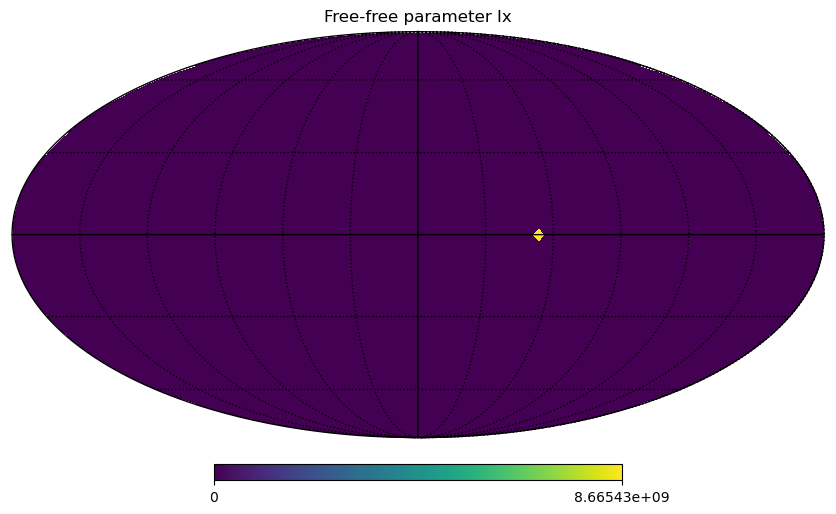

In [50]:
Ix=10**c7

hp.mollview(Ix,nest=True,title='Free-free parameter Ix')
hp.graticule()



In [ ]:
### histogram for delta_a

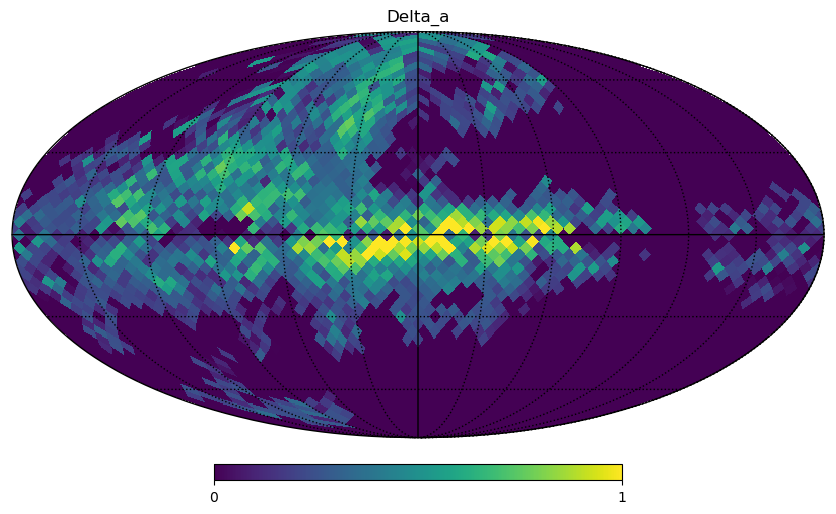

In [110]:
delta_a_convex=np.zeros(len(model_pix))
for i in range(len(model_pix)):
    if model_pix[i]==0:
        delta_a_convex[i]=10**c5[i]
    else:
        delta_a[i]='NaN'

hp.mollview(delta_a_convex,nest=True,title='Delta_a')
hp.graticule()

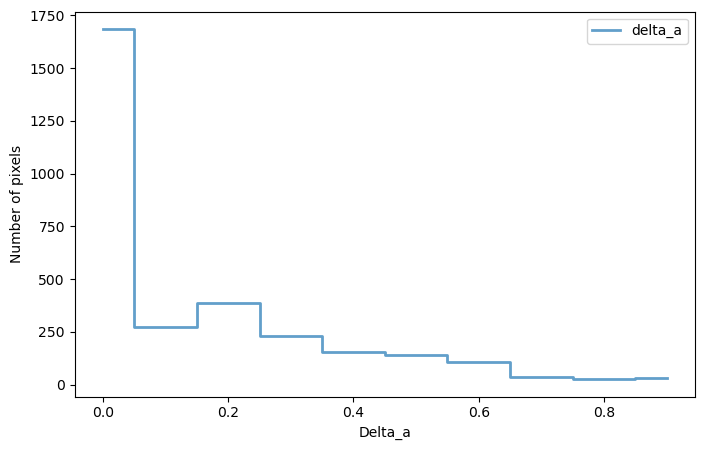

In [69]:
bins = np.linspace(0, 1, 11)

hist1, edges = np.histogram(delta_a_convex, bins=bins)

plt.figure(figsize=(8, 5))
plt.step(edges[:-1], hist1, where="mid", label="delta_a", linewidth=2, alpha=0.7)
plt.xlabel("Delta_a")
plt.ylabel("Number of pixels")
plt.legend()
plt.show()


In [124]:
bin_in_mat = np.digitize(delta_a, bins)
#bin_contents = [np.argwhere(bin_in_mat == i) for i in range(len(bins))]

In [127]:
# for n in range(delta_a.size):
#   print(bins[bin_in_mat[n]-1], "<=", delta_a[n], "<", bins[bin_in_mat[n]])

In [128]:
# bin10=np.where(bin_in_mat==10)

In [129]:
# delta_a_convex10=np.zeros(len(model_pix))
# for i in range(len(bin_in_mat)):
#     if bin_in_mat[i]==10:
#         delta_a_convex10[i]=10**c5[i]
#     else:
#         delta_a_convex10[i]='NaN'
# hp.mollview(delta_a_convex10,nest=True,title='Delta_a')
# hp.graticule()

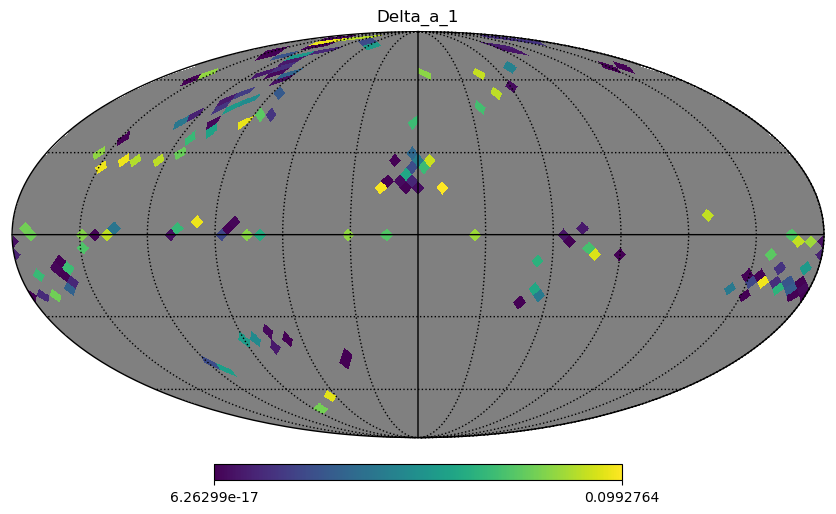

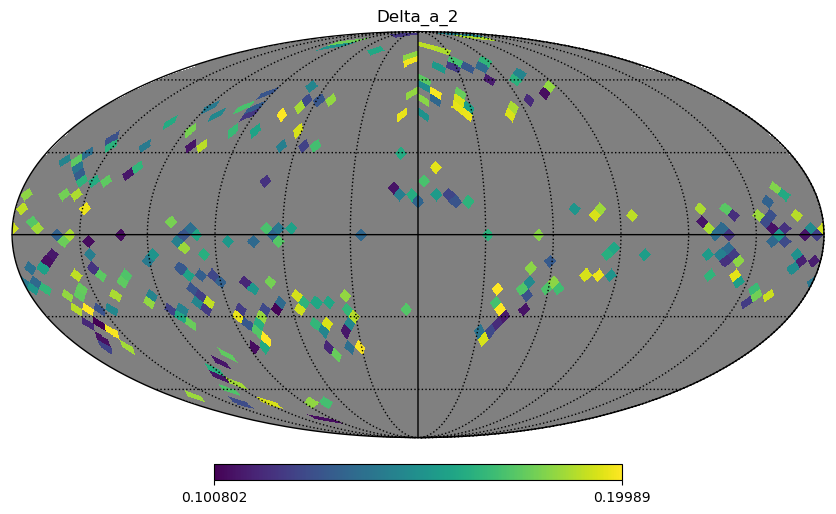

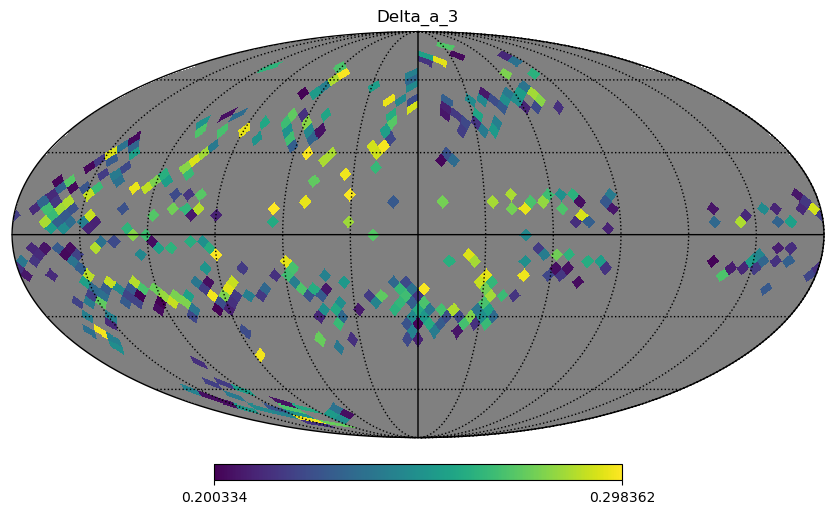

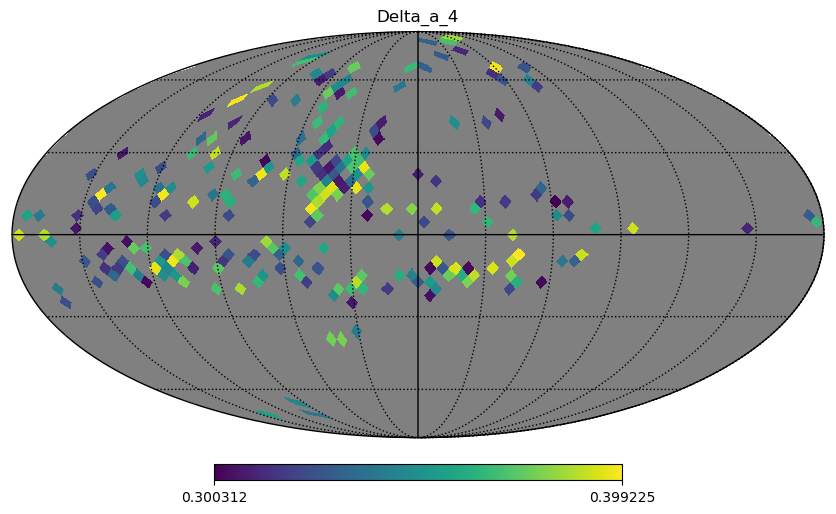

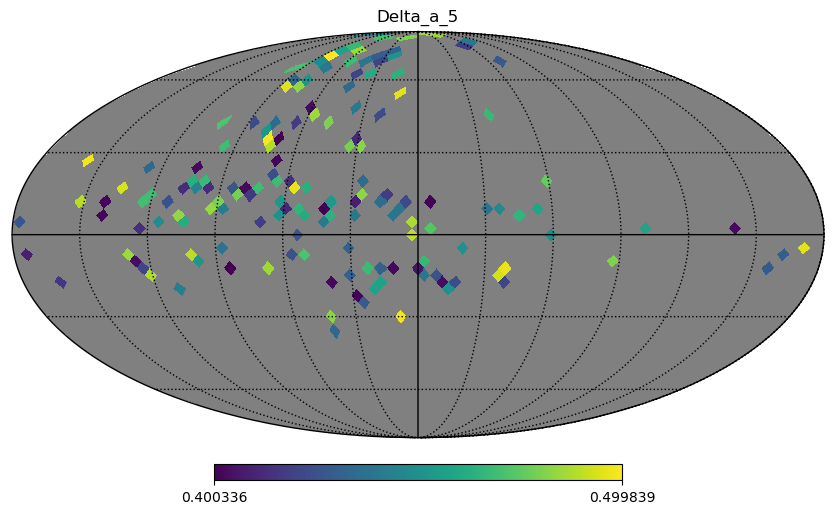

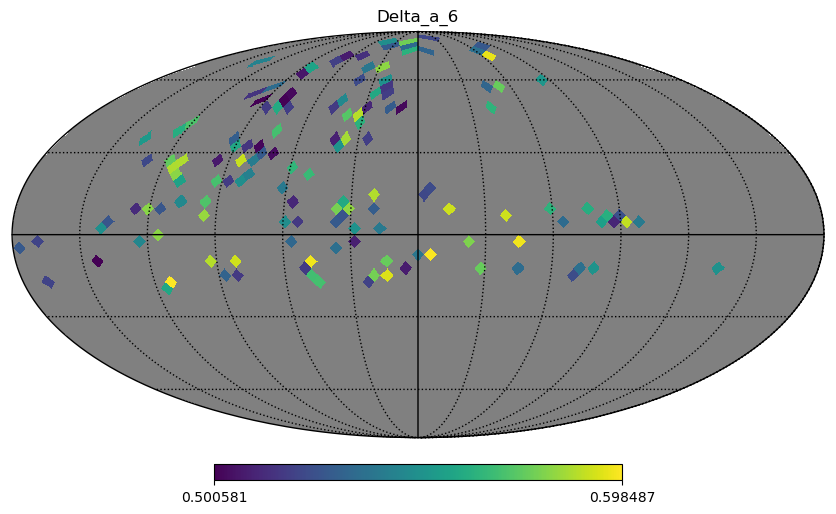

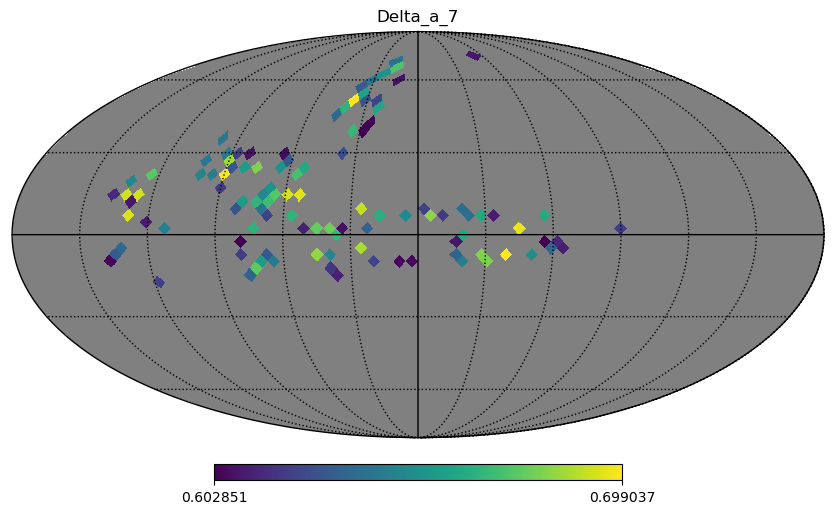

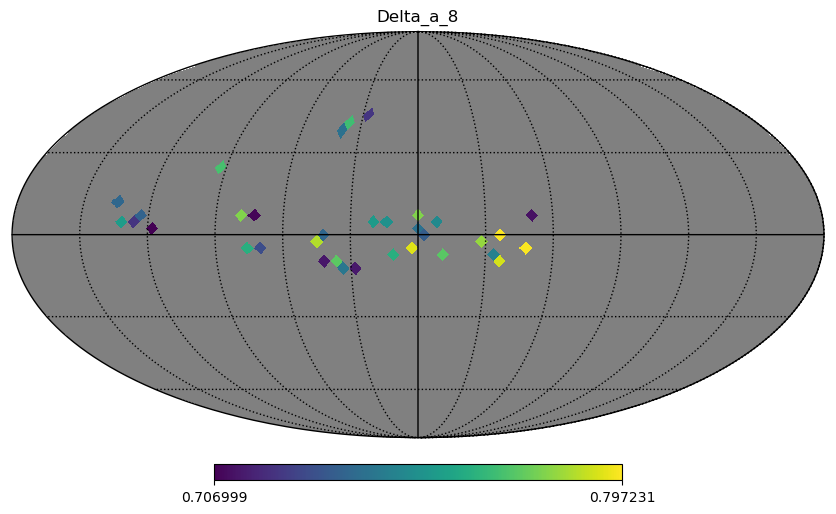

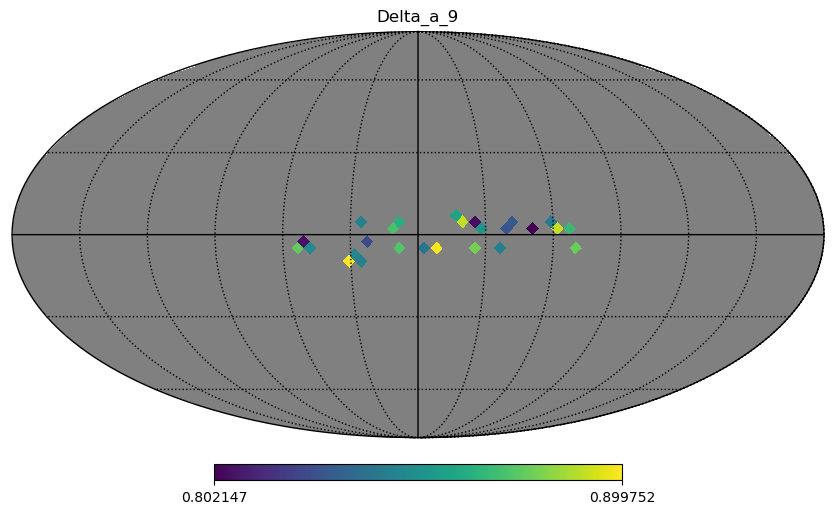

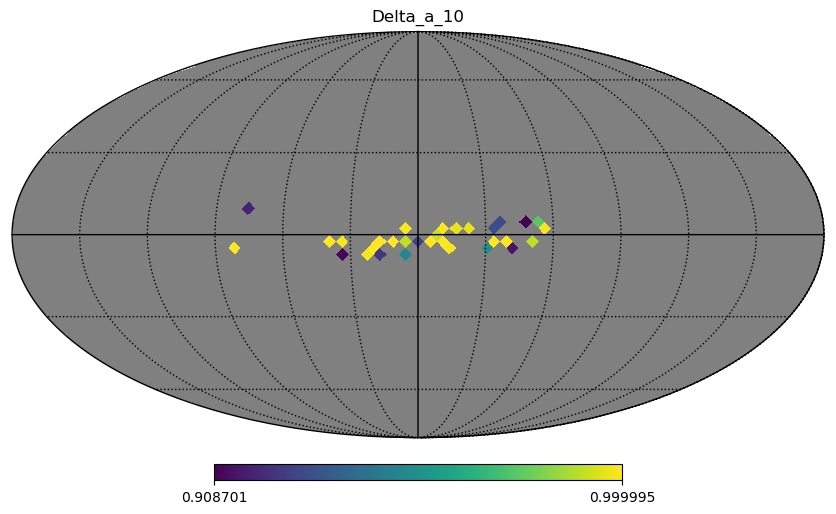

In [130]:
delta_a_convex_bins=np.zeros((len(bins),len(model_pix)))
for ii in range(1,len(bins)):
    for i in range(len(bin_in_mat)):
        if bin_in_mat[i]==ii:
            delta_a_convex_bins[ii][i]=10**c5[i]
        else:
            delta_a_convex_bins[ii][i]='NaN'
    hp.mollview(delta_a_convex_bins[ii],nest=True,title=f'Delta_a_{ii}')
    hp.graticule()

    


# delta_a_convex9=np.zeros(len(model_pix))
# for i in range(len(bin_in_mat)):
#     if bin_in_mat[i]==9:
#         delta_a_convex9[i]=10**c5[i]
#     else:
#         delta_a_convex9[i]='NaN'
# hp.mollview(delta_a_convex9,nest=True,title='Delta_a')
# hp.graticule()

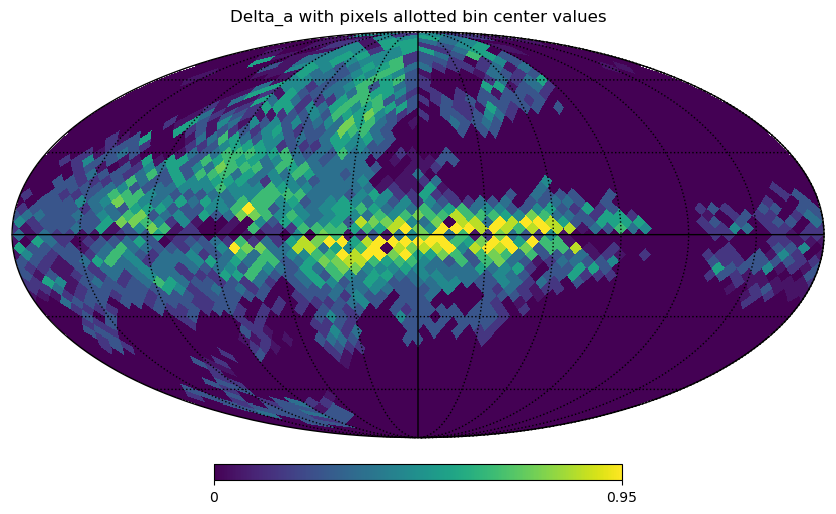

In [147]:
centers=np.zeros(len(edges)-1)
for i in range(1,len(edges)):
    centers[i-1]=edges[i-1]+(edges[i]-edges[i-1])/2

delta_a_convex_bins_final=np.zeros(len(model_pix))

for ii in range(1,len(bins)):
    for i in range(len(bin_in_mat)):
        if bin_in_mat[i]==ii:
            delta_a_convex_bins_final[i]=centers[ii-1]
        #else:
            #delta_a_convex_bins_final[i]='NaN'
hp.mollview(delta_a_convex_bins_final,nest=True,title='Delta_a with pixels allotted bin center values')
hp.graticule()

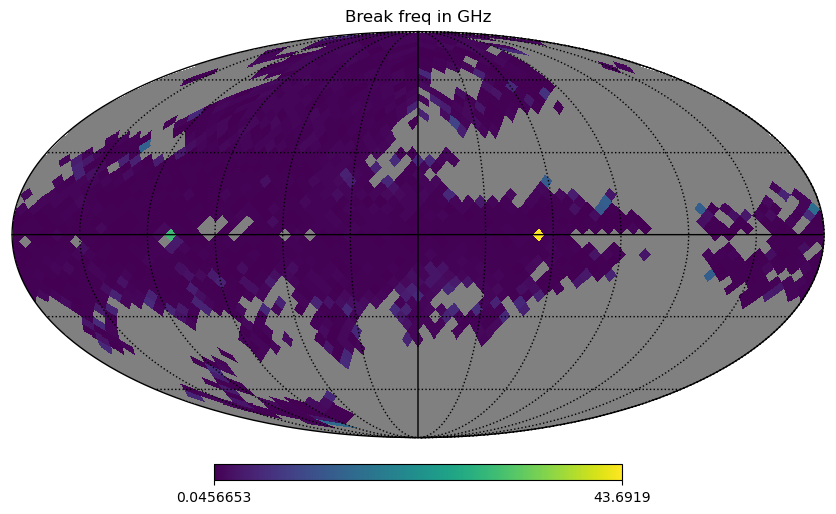

In [152]:
nu_break=np.zeros(len(model_pix))
for i in range(len(model_pix)):
    if model_pix[i]==0:
        nu_break[i]=1e-9*10**c6[i]
    else:
        nu_break[i]='NaN'
    

nu_break1=np.copy(nu_break)

    
hp.mollview(nu_break1,nest=True,title='Break freq in GHz')
hp.graticule()

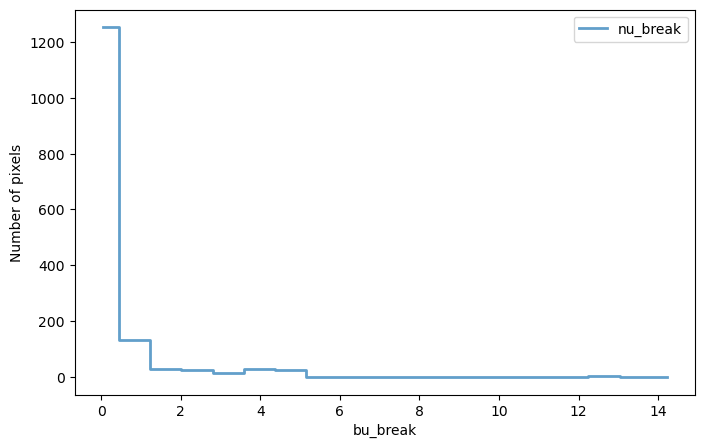

In [160]:
binsnu = np.linspace(0.0456653, 15, 20)

histnu, edgesnu = np.histogram(nu_break1, bins=binsnu)

plt.figure(figsize=(8, 5))
plt.step(edgesnu[:-1], histnu, where="mid", label="nu_break", linewidth=2, alpha=0.7)
plt.xlabel("bu_break")
plt.ylabel("Number of pixels")
plt.legend()
plt.show()


In [161]:
bin_in_nu = np.digitize(nu_break1, binsnu)


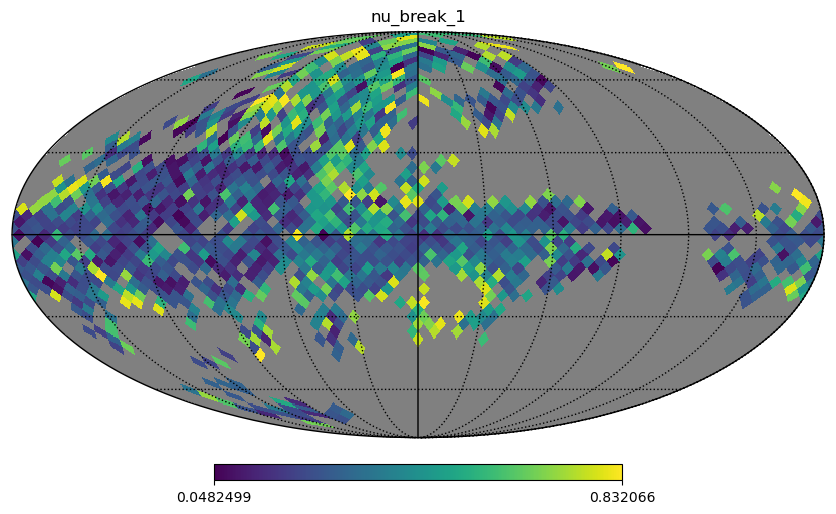

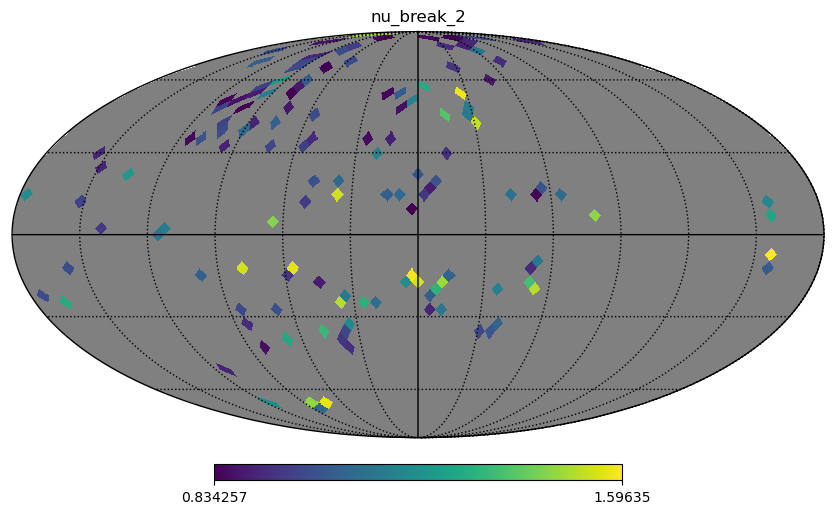

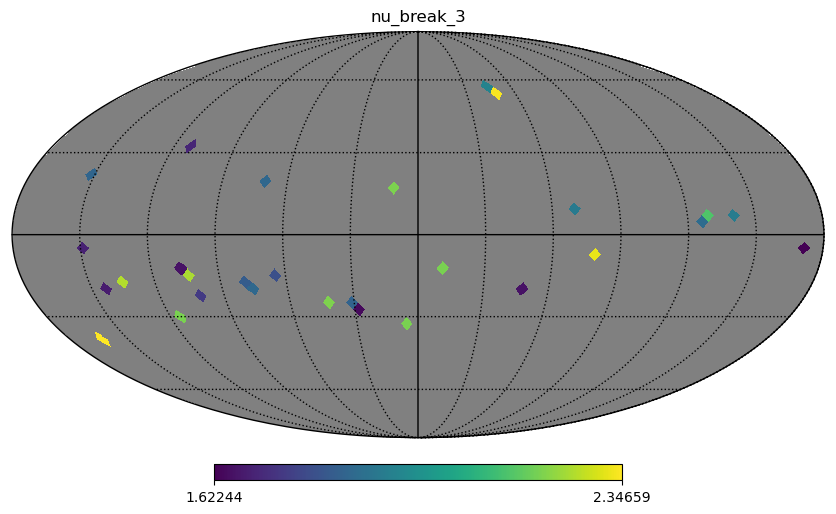

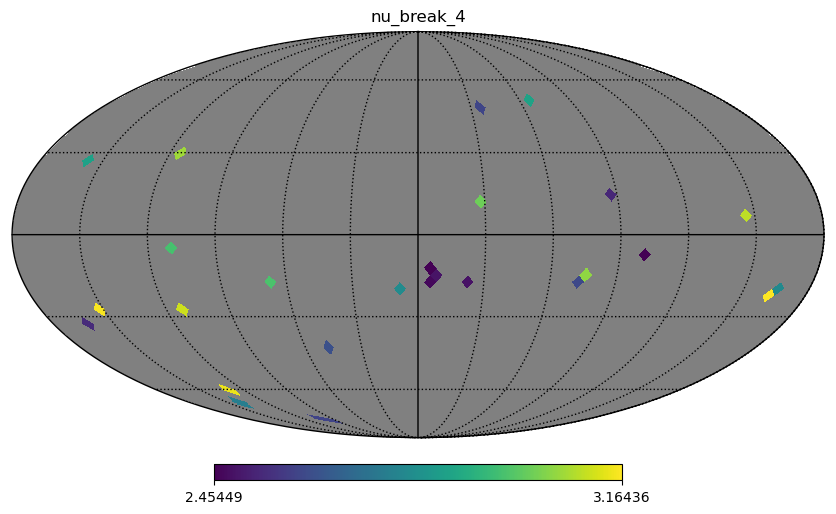

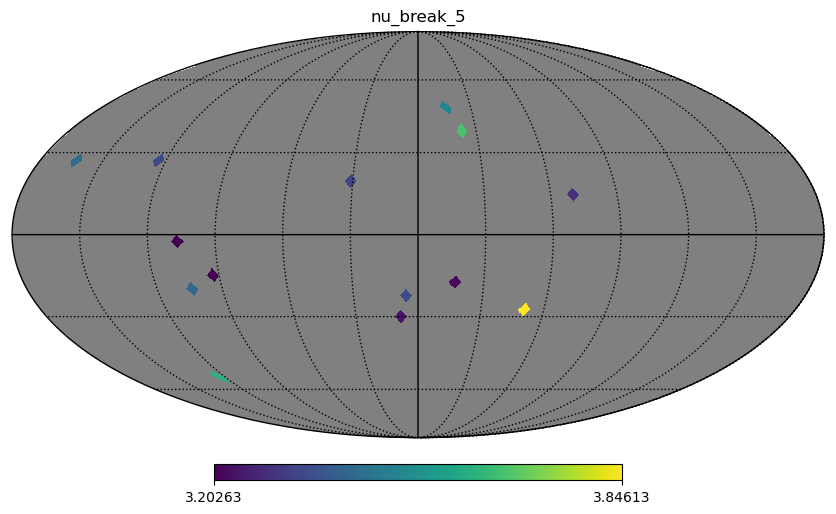

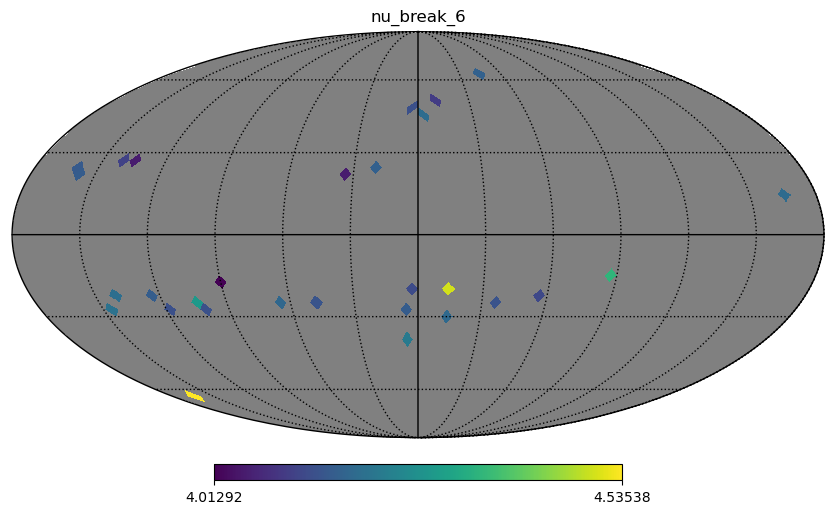

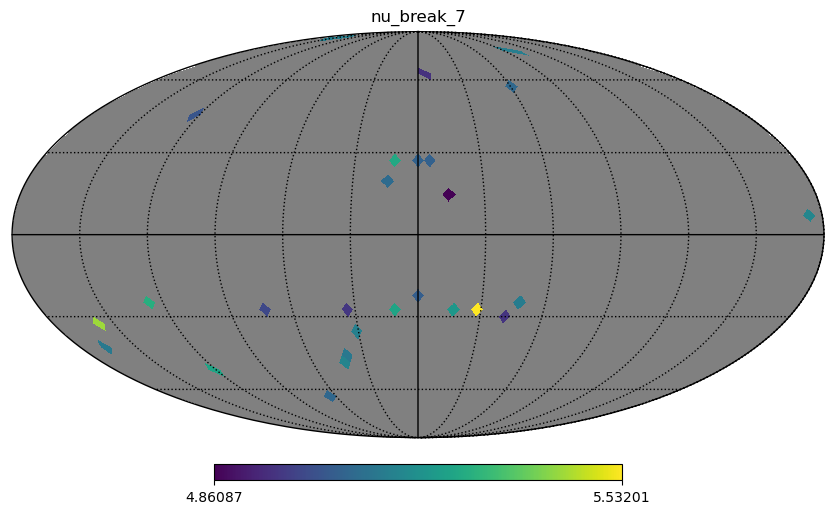

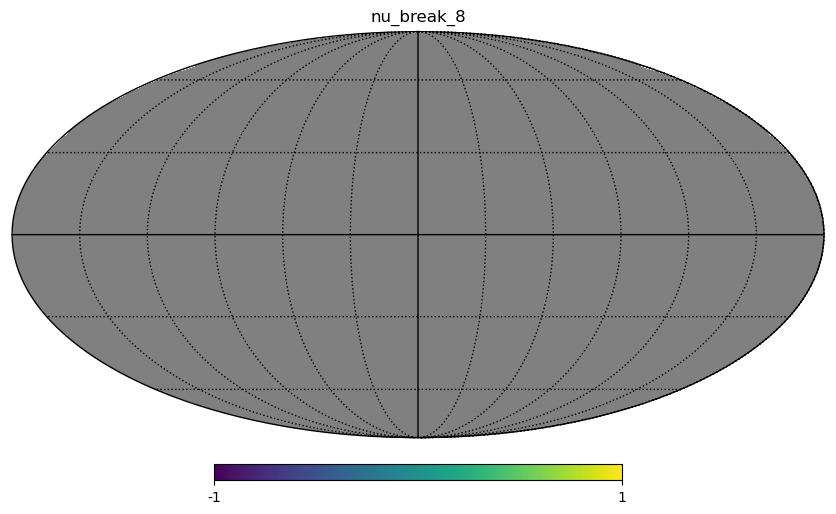

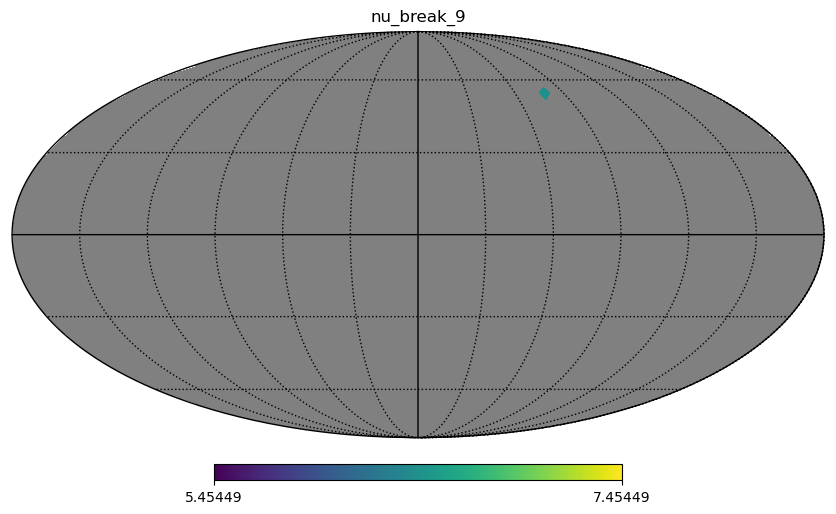

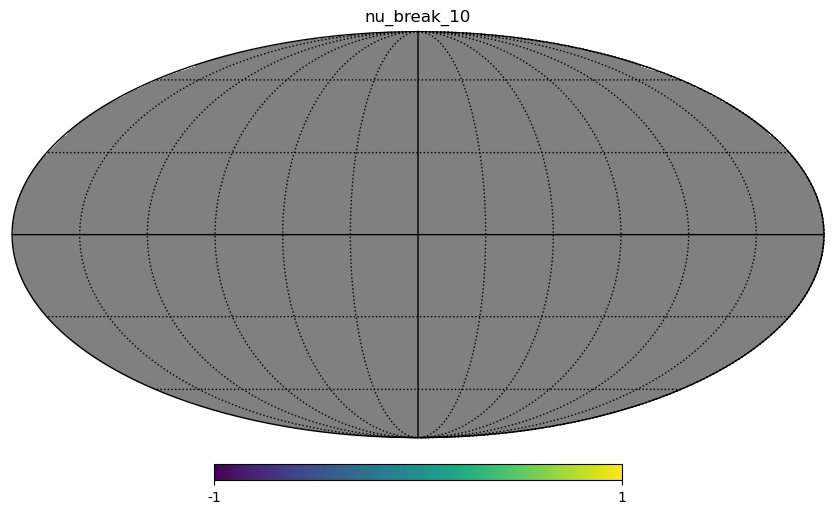

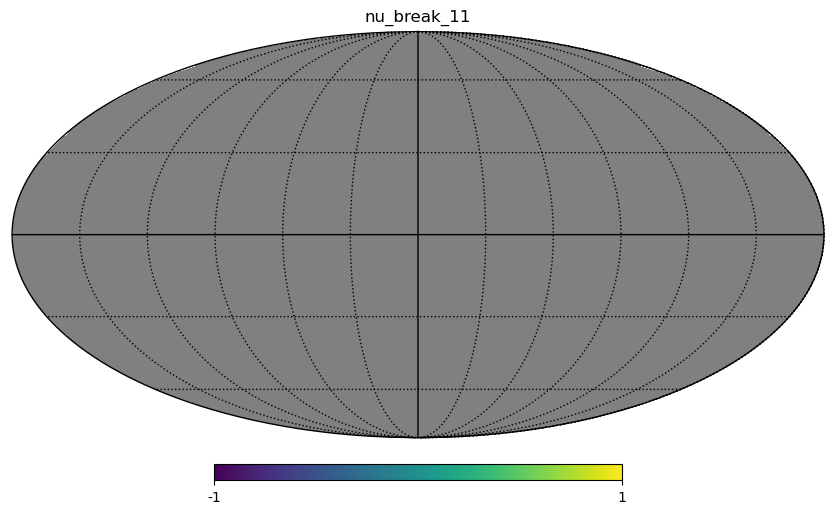

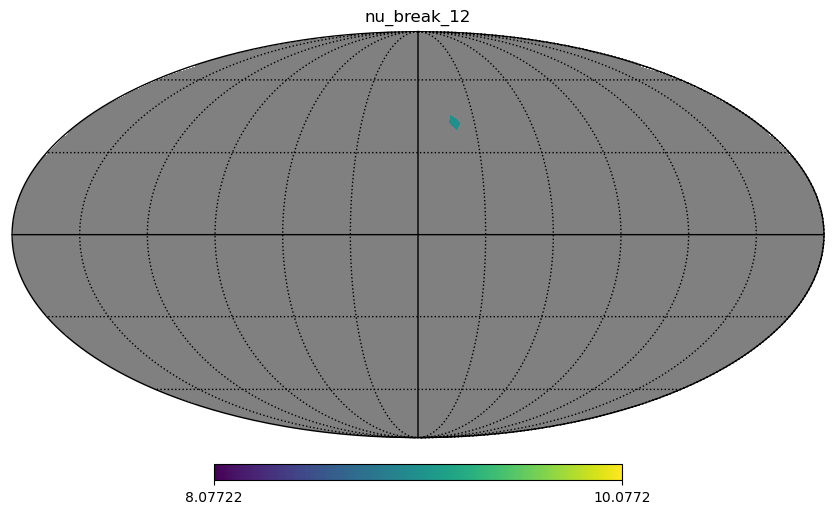

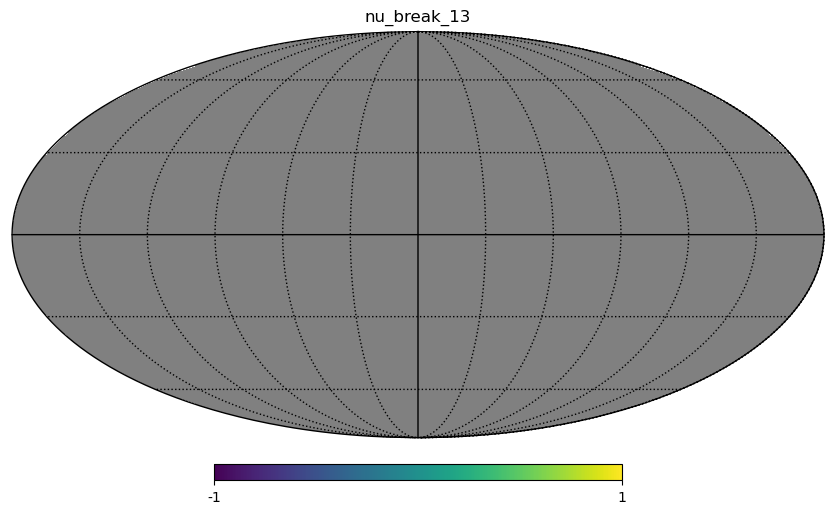

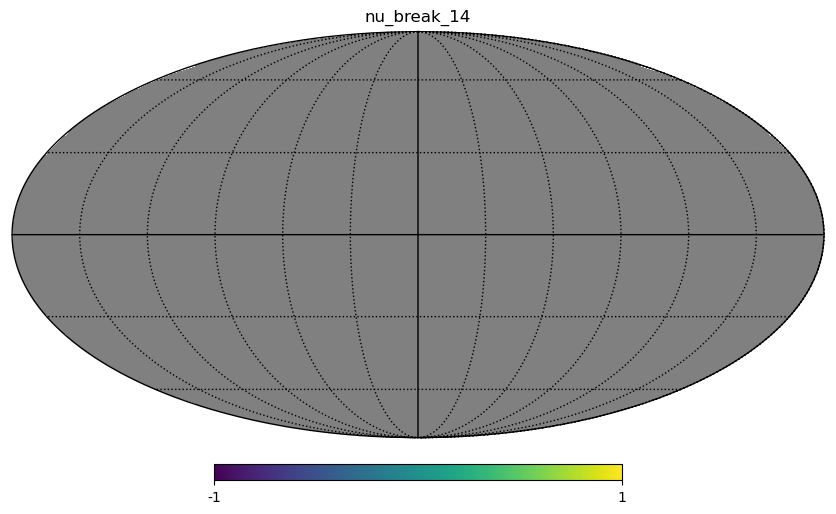

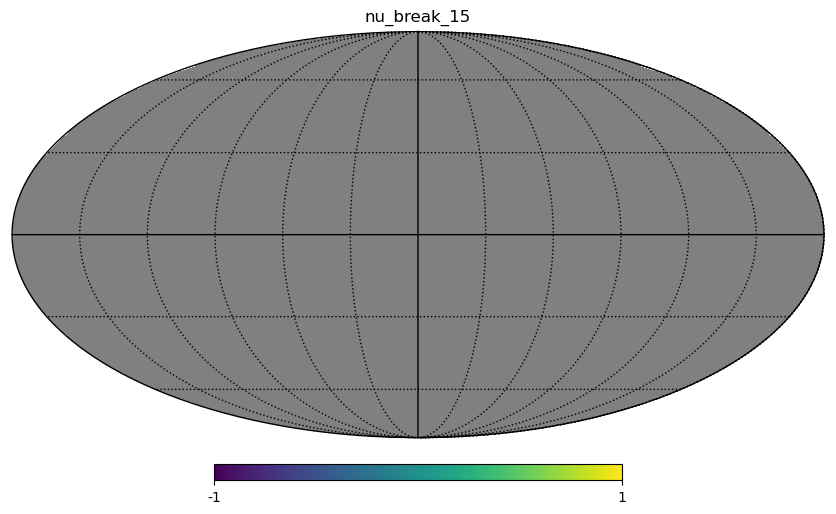

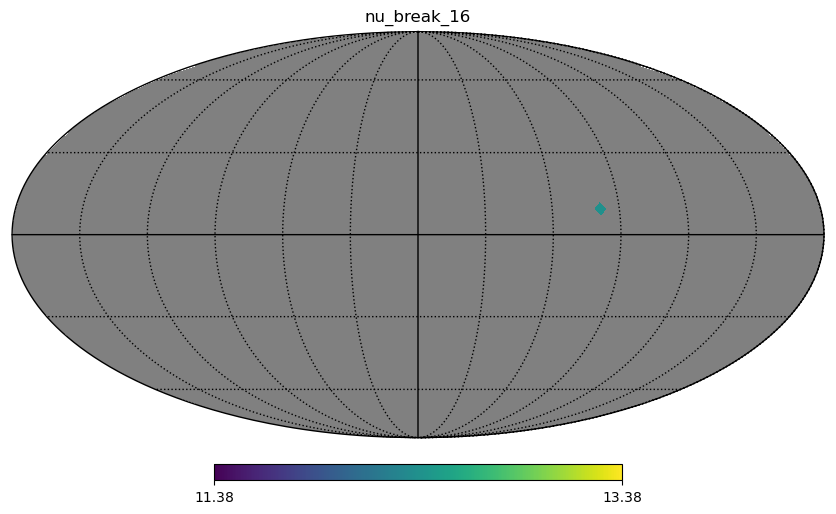

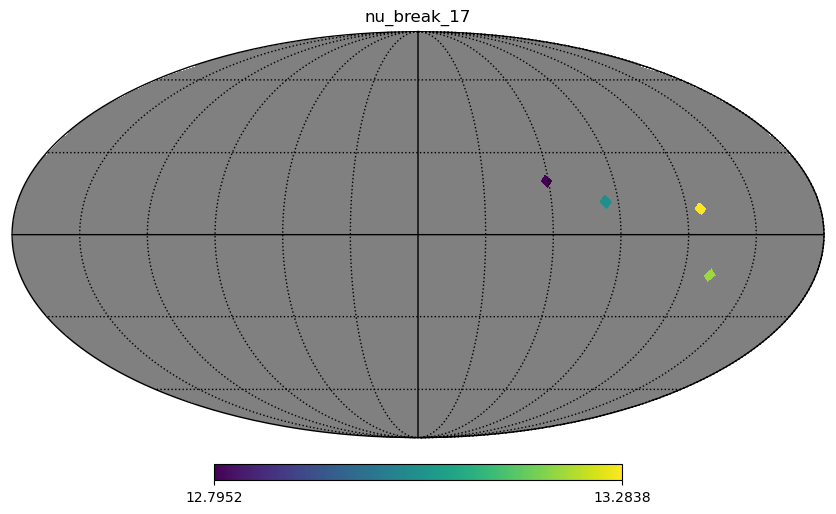

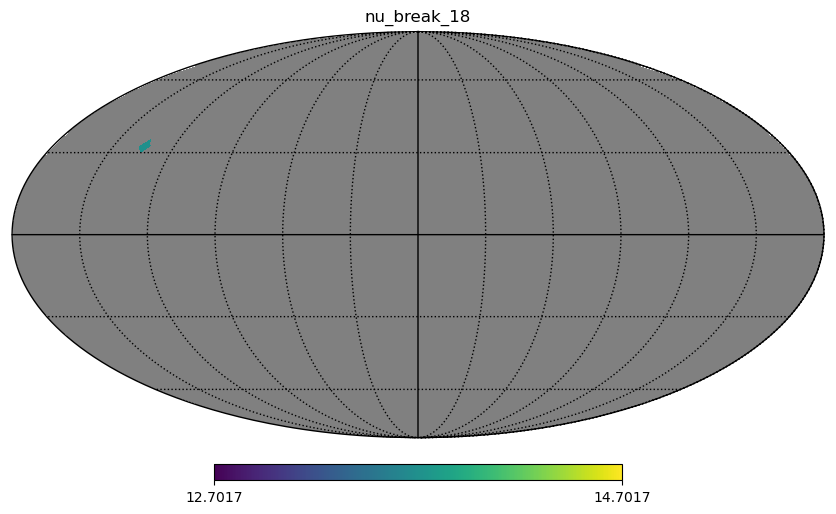

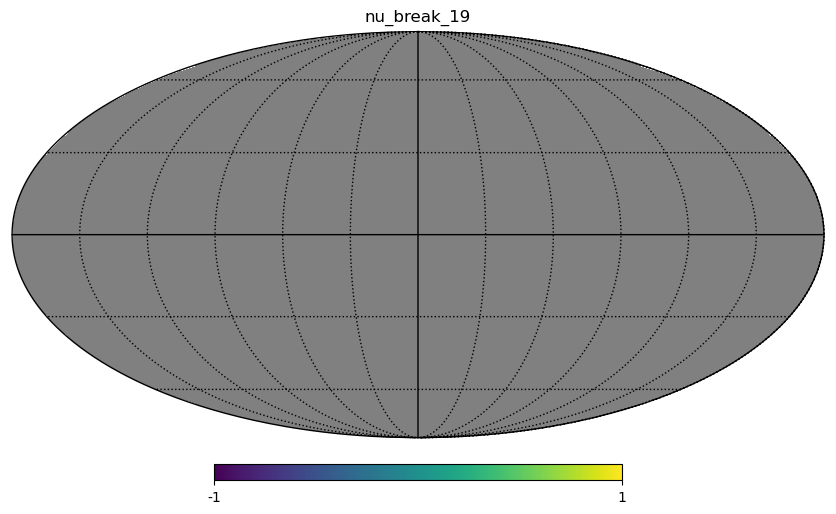

In [163]:
nubreak_convex_bins=np.zeros((len(binsnu),len(model_pix)))
for ii in range(1,len(binsnu)):
    for i in range(len(bin_in_nu)):
        if bin_in_nu[i]==ii:
            nubreak_convex_bins[ii][i]=1e-9*10**c6[i]
        else:
            nubreak_convex_bins[ii][i]='NaN'
    hp.mollview(nubreak_convex_bins[ii],nest=True,title=f'nu_break_{ii}')
    hp.graticule()

    